In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
def process_for_url(text):  # still need to fix hyphen problem
    ignore_capitalize = ["of","the","in"]
    puctuation_without_hyphen = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'
    
    text = text.casefold()
    words =  text.split()
    words = [word.lower() if word in ignore_capitalize or word.startswith('il-') else word.capitalize() for word in words]
    join = str(words).translate(str.maketrans('', '', puctuation_without_hyphen))
    join = hyphen_capitalize(join)

    return join.replace(' ', '+')

def hyphen_capitalize(text):

    l = list(text)
    
    for idx, char in enumerate(l):
        if char == '-':
            l[idx + 1] = l[idx + 1].upper()
            #l.remove(l[idx])

    to_str = ''.join(l)

    return to_str
    

def get_card_price(name,card_set):

    url = f'https://www.mtggoldfish.com/price/{process_for_url(card_set)}/{process_for_url(name)}#online'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        price = soup.find_all('div')[11].find_all('div')[14]
    except IndexError:
        print(name,card_set,'something went wrong, next cell')
        price = ['0']
    price_num = [da_price.replace('\xa0',' ').replace('$','') for da_price in price][0]
  
    return price_num


    

In [4]:
card_df = pd.read_csv('Cards_Sheet2.csv')

#card_df.applymap()
card_df['Price'] = card_df.apply(lambda row: get_card_price(row.Title,row.Set),axis=1)
card_df.Price = card_df.Price.astype(dtype=float)

card_df['my_value'] = card_df.Quantity * card_df.Price

card_df[['Quantity','Price','my_value']].sum()

Quantity    245.00
Price       574.39
my_value    643.69
dtype: float64

In [5]:
card_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,170.0,1.441176,0.768891,1.0,1.0000,1.000,2.000,4.0
Price,170.0,3.378765,12.644055,0.2,0.2600,0.375,1.745,150.0
my_value,170.0,3.786412,12.735812,0.2,0.3025,0.600,2.370,150.0


In [6]:
card_df.sort_values(by=['Price'],ascending=False)


,Title,Set,Quantity,Price,my_value
43,metalworker,Urzas Destiny,1,150.00,150.00
112,argothian enchantress,Urzas Saga,1,39.49,39.49
130,lifeline,Urzas Saga,1,33.99,33.99
152,dream halls,Stronghold,1,28.63,28.63
54,repercussion,Urzas Destiny,1,20.75,20.75
...,...,...,...,...,...
168,wall of diffusion,Tempest,1,0.24,0.24
151,death stroke,Stronghold,1,0.24,0.24
159,enfeeblement,Tempest,3,0.23,0.69
105,divine offering,Mirage,1,0.23,0.23


In [7]:
card_df[card_df.columns[2:]] \
    .sort_values(by=['Price'],ascending=False)[100:] \
        .sum()


Quantity    111.00
Price        18.43
my_value     29.56
dtype: float64

In [8]:
card_df.sort_values(by=['Price'],ascending=False)[50:]

,Title,Set,Quantity,Price,my_value
26,false prophet,Urzas Destiny,2,1.18,2.36
140,soul sculptor,Urzas Saga,4,1.13,4.52
33,goblin festival,Urzas Destiny,1,0.94,0.94
157,spike feeder,Stronghold,1,0.85,0.85
8,waiting in the weeds,Classic Sixth Edition,1,0.84,0.84
...,...,...,...,...,...
168,wall of diffusion,Tempest,1,0.24,0.24
151,death stroke,Stronghold,1,0.24,0.24
159,enfeeblement,Tempest,3,0.23,0.69
105,divine offering,Mirage,1,0.23,0.23


In [9]:
card_df[card_df.columns[2:]].query('Price < 2.0').sum()

Quantity    192.00
Price        55.24
my_value     80.76
dtype: float64

In [10]:
card_df.query('10 <= Price <= 20')

,Title,Set,Quantity,Price,my_value
5,final fortune,Classic Sixth Edition,1,15.77,15.77
18,carnival of souls,Urzas Destiny,2,10.79,21.58
47,opalescence,Urzas Destiny,1,17.86,17.86
99,charisma,Mercadian Masques,1,14.99,14.99
113,barrin master wizard,Urzas Saga,1,17.88,17.88
138,Smokestack,Urzas Saga,1,13.31,13.31
166,time warp,Tempest,1,17.05,17.05


In [11]:
from matplotlib import pyplot as plt

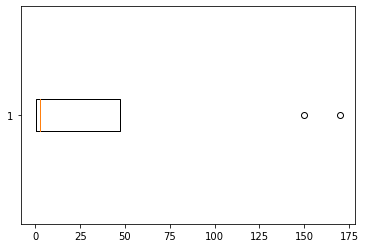

In [12]:
plt.boxplot(card_df.Price.describe(), vert=False)
plt.show()

In [13]:
cheaps = card_df.Price <= 2
mids = (card_df.Price >= 2) & (card_df.Price<150)
spendy = card_df.Price >= 150

num_cols = card_df.columns[2:]

In [27]:
print(f'cheaps: \n{card_df[num_cols][cheaps].sum()}', \
    '\n'
    f'mids: \n{card_df[num_cols][mids].sum()}', \
        '\n'
        f'highs: \n{card_df[num_cols][spendy].sum()}'
        )

cheaps: 
Quantity    192.00
Price        55.24
my_value     80.76
dtype: float64 
mids: 
Quantity     52.00
Price       369.15
my_value    412.93
dtype: float64 
highs: 
Quantity      1.0
Price       150.0
my_value    150.0
dtype: float64


In [34]:
def get_card_price2(name,card_set):

    url = f'https://www.mtggoldfish.com/price/{process_for_url(card_set)}/{process_for_url(name)}#online'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    try:
        price = soup.find_all('div')[11].find_all('div')[14]
        print(price, type(price))
    except IndexError:
        print(name,card_set,'something went wrong, next cell')
        price = ['0']
    # price_num = [da_price.replace('\xa0',' ').replace('$','') for da_price in price][0]
    return price[]


In [36]:
bim = get_card_price2('time warp', 'tempest')

<div class="price-box-price">$ 17.01</div> <class 'bs4.element.Tag'>


In [37]:
bim.get()

TypeError: get() missing 1 required positional argument: 'key'